## Learning Support Vector Machines

In [1]:
# Importing everything
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from tqdm import tqdm

In [2]:
# Define Data
X, y = datasets.make_blobs(
    n_samples=100, n_features=2, centers=2, cluster_std=1.05
)
y = np.where(y == 0, -1, 1)

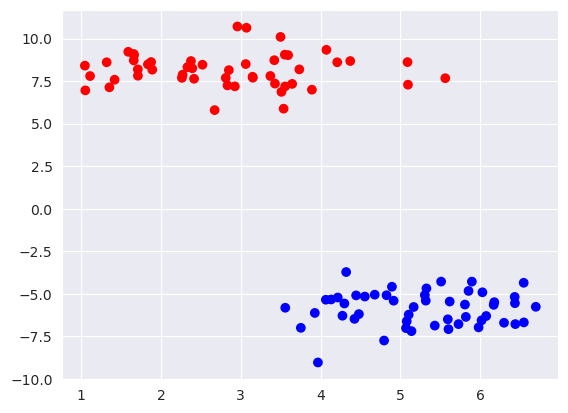

In [3]:
# Plot the data
sns.set_style("darkgrid")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr")

In [4]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)
print(X.shape)

(100, 2)


In [5]:
# Define SVM class
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param =lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        # Update loop
        # Iterate n_iter times
        for _ in tqdm(range(self.n_iters)):

            # Iterate over every training sample
            for idx, x_i in enumerate(X):

                # Evaluate with current state of w and b
                pred = y[idx] * (np.dot(self.w, x_i) - self.b) >= 1

                # Update w and b depending on prediction
                # Applying: Hinge loss
                if pred:
                    self.w -= self.lr * 2 * self.lambda_param * self.w
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        pred = np.dot(self.w, X) - self.b
        return np.sign(pred)

In [6]:
# Train the model
model = SVM()
model.fit(X_train, y_train)

100%|██████████| 1000/1000 [00:00<00:00, 3504.87it/s]


In [7]:
# Test the model
y_pred = []
for idx, y_i in enumerate(y_test):
    pred = model.predict(X_test[idx])
    y_pred.append(pred)

print(f"{np.asarray(y_pred) - y_test}")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
def visualize_svm():
    def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap="bwr")
    
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane(x0_1, model.w, model.b, 0)
    x1_2 = get_hyperplane(x0_2, model.w, model.b, 0)

    x1_1_m = get_hyperplane(x0_1, model.w, model.b, -1)
    x1_2_m = get_hyperplane(x0_2, model.w, model.b, -1)

    x1_1_p = get_hyperplane(x0_1, model.w, model.b, 1)
    x1_2_p = get_hyperplane(x0_2, model.w, model.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

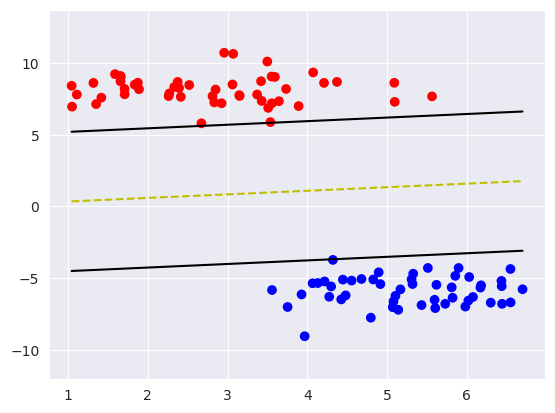

In [9]:
visualize_svm()

In [10]:
print(model.w, model.b)

[-0.05138091  0.20623024] 0.02000000000000001
